In [137]:
import numpy as np
import scipy.optimize as opt
import sympy as sy
from matplotlib import pyplot as plt
import math

# Problem 1

In [105]:
def golden_section(f,a,b,niter):
    rho = 0.5*(3-np.sqrt(5))
    iteration = 0
    while iteration < niter:
        a1 = a+rho*(b-a)
        b1 = a+(1-rho)*(b-a)
        if f(a1)>=f(b1):
            a=a1
        else:
            b=b1
        iteration+=1
    return (a+b)/2

In [106]:
f = lambda x: sy.exp(x)-4*x
a = 0
b = 3
niter = 13
gold = golden_section(f,a,b,niter)
actual = opt.minimize(f,1).x[0]
print('Golden Section Min:', gold)
print('Actual Min:', actual)
print('Takes', niter, 'steps to hit within 0.001 of true value.')

Golden Section Min: 1.38557821677
Actual Min: 1.38629414311
Takes 13 steps to hit within 0.001 of true value.


# Problem 2

In [107]:
def bisection(f,a,b,niter):
    iteration = 0
    while iteration < niter:
        m = (a+b)/2
        der = sy.mpmath.diff(f,m)
        if der>0:
            b=m
        elif der<0:
            a=m
        else:
            return m
        iteration+=1
    return (a+b)/2

In [108]:
niter2 = 9
bisect = bisection(f,a,b,niter2)
print('Bisection Min:', bisect)
print('Actual Min:', actual)
print('Takes', niter2, 'steps to hit within 0.001 of true value.')

Bisection Min: 1.3857421875
Actual Min: 1.38629414311
Takes 9 steps to hit within 0.001 of true value.


In [109]:
%timeit golden_section(f,a,b,niter)
%timeit bisection(f,a,b,niter2)

1000 loops, best of 3: 1.07 ms per loop
1000 loops, best of 3: 1.16 ms per loop


Therefore, bisection takes less step but takes more time computationally (due to finding the derivative)

# Problem 3

In [125]:
def newton_method(x0,f,f1,f2):
    err=1e10
    reach = False
    epsilon = 1e-10
    iteration=0
    while not reach and iteration<1e5:
        x1 = x0-(f1(x0)/f2(x0))
        err = abs(x1-x0)
        if err < epsilon*abs(x0):
            reach=True
        x0 = x1
        iteration+=1
    return x0

In [126]:
f = lambda x: x**2+math.sin(5*x)
f1 = lambda x: 2*x+5*math.cos(5*x)
f2 = lambda x: 2-25*math.sin(5*x)
x0 = 0
print('Newton method with x0=', x0, ":", newton_method(x0,f,f1,f2))
x0=1
print('Newton method with x0=', x0, ":", newton_method(x0,f,f1,f2))
x0=4
print('Newton method with x0=', x0, ":", newton_method(x0,f,f1,f2))

Newton method with x0= 0 : -1.4473142236328096
Newton method with x0= 1 : 0.8712810830760778
Newton method with x0= 4 : 6.067548627507285


# Problem 4

In [130]:
def secant_method(x0,x1,f,f1):
    err=1e10
    reach = False
    epsilon = 1e-10
    iteration=0
    while not reach and iteration<1e5:
        f2 = (f1(x1)-f1(x0))/(x1-x0)
        x2 = x1-(f1(x1))/f2
        err = abs(x2-x1)
        if err < epsilon*abs(x1):
            reach=True
        x0 = x1
        x1 = x2
        iteration+=1
    return x2

In [133]:
f = lambda x: x**2+np.sin(x)+np.sin(10*x)
f1 = lambda x: 2*x+np.cos(x)+10*np.cos(10*x)
x0=0
x1=-1
print('Secant method with initial points [', x0, x1,']:', secant_method(x0,x1,f,f1))
x0=3
x1=2
print('Secant method with initial points [', x0, x1,']:', secant_method(x0,x1,f,f1))

Secant method with initial points [ 0 -1 ]: -0.163677221182
Secant method with initial points [ 3 2 ]: -4.35450730766


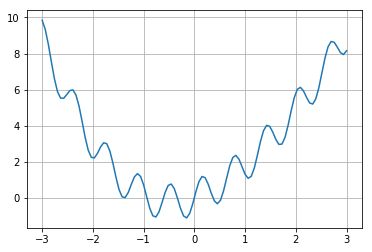

As seen, this function is highly sensitive to the starting point


In [141]:
x = np.linspace(-3,3,100)
y = np.vectorize(f)(x)
plt.plot(x,y)
plt.grid()
plt.show()
print('As seen, this function is highly sensitive to the starting point')

# Problem 5

In [155]:
def armijo(f,Df,x0,p):
    alpha = 1
    rho = 0.5
    c = 0.5
    val = Df(x0).T@p
    calc = f(x0+alpha*p)
    calc2 = f(x0)+c*alpha*val
    while calc>calc2:
        alpha = rho*alpha
        calc = f(x0+alpha*p)
        calc2 = f(x0)+c*alpha*val
    return alpha

In [157]:
from scipy.optimize import line_search
def objective(x):
    return x[0]**2 + 4*x[1]**2
def grad(x):
    return np.array([2*x[0], 8*x[1]])

x = np.array([1., 3.]) # current point
p = -grad(x) # current search direction
a = line_search(objective, grad, x, p)[0]
print('Actual step size:', a)

alpha = armijo(objective,grad,x,p)
print('Implemented step size:', alpha)

Actual step size: 0.125649913345
Implemented step size: 0.125
